### ML of model for predicting if a person has diabetes or not

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the data with the help of pandas library

In [4]:

df = pd.read_csv('pima-indians-diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigreeF  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies          0
Glucose              0
BloodPressure        0
SkinThickness        0
Insulin              0
BMI                  0
DiabetesPedigreeF    0
Age                  0
Outcome              0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

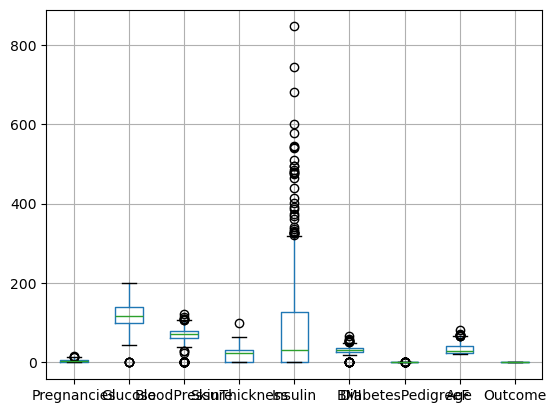

In [6]:
df.boxplot()

#### outliers doesnot effect Random Forest Algorithm

#### Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = df.drop('Outcome', axis = 1)

In [10]:
y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#### Building and fitting the Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier()

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

In [17]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [19]:
def model_builder(estimator, metric, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)
    model = estimator()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = accuracy_score(y_test, y_pred)
    return result

In [20]:
model_builder(RandomForestClassifier, accuracy_score, X,y)

0.7467532467532467